<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/Decision_Trees_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Business Analytics: Introduction to `scikit-learn`

In this code-along notebook, we will:

1. Introduce the basics of `scikit-learn`, a popular machine learning library in Python
2. Examine features and capabilities of `scikit-learn`
3. Learn how to install and import `scikit-learn`
4. View and load a dataset from `scikit-learn`
5. Create and visualize a decision tree
---



# Overview of `scikit-learn`

## What is `scikit-learn`?

`scikit-learn` is an open-source machine learning library in Python that provides simple and efficient tools for data analysis and machine learning tasks. `scikit-learn` supports supervised and unsupervised learning using various algorithms for classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.

`scikit-learn` is built on top of other Python libraries such as `NumPy`, `SciPy`, and `Matplotlib` and is designed to interoperate with these libraries.

##Features and Capabilities of `scikit-learn`

>- **Consistency**: The library provides a uniform interface across different algorithms, making it easy to switch between models.
>- **Rich Set of Algorithms**: `scikit-learn` includes a wide range of machine learning algorithms for both supervised and unsupervised learning tasks.
>- **Ease of Use**: It's designed with a user-friendly interface, allowing users to implement machine learning models with minimal lines of code.
>- **Data Handling**: Supports various data formats like `NumPy` arrays, `Pandas` DataFrames, and `SciPy` sparse matrices, making it compatible with different data types.
>- **Model Evaluation**: Provides tools for model evaluation, including metrics for assessing performance and methods for cross-validation.

---

# Installation and Setup
>- Colab: `scikit-learn` is preinstalled when working in a Colab environment so all that needs to be done is importing
>- Using pip: `pip install scikit-learn`
>- Using conda: `conda install scikit-learn`

# Importing Necessary Libraries
>- In the next cell we will import scikit learn and load a dataset from the `sklearn.datasets` module. This module provides a way to load popular tutorial datasets such as the `iris` dataset
>- We will import the `DecisionTreeClassifier` for this tutorial to align with our readings and examples in the course
>- Other lessons will cover importing other algorithms


In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib as plt
import pandas as pd

---
# End of Video 1
---

# Viewing and Loading Datasets from `sklearn.datasets`

>- `scikit-learn` provides quite a few datasets that we can easily load to practice machine learning
>- [`sklearn.datasets` doc](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

First, let's view what's available in the datasets module using the `dir()` function.
>- `dir()` returns a list of valid attributes and methods that belong to an object
>- In the datasets module, we will look for the methods that start with `load_` or `fetch_` to see available datasets

In [ ]:
dir(datasets)

In [ ]:
dataset_names = [i for i in dir(datasets) if i.startswith('load') or i.startswith('fetch')]
dataset_names

Ok, now let's load a dataset. A very common tutorial dataset in Data Science tutorials is the `iris` dataset so lets start with that one.

>- We can pass `as_frame=True` so that the data matrix will be a Pandas DataFrame

In [ ]:
iris = datasets.load_iris(as_frame = True)

print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


`iris.data` will show us a dataframe of features
>- This will become our `X` variable name when we create a model

In [ ]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


`iris.target` will show us a Series of the target values
>- This will be our `y` variable name when we create a model

In [ ]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

Let's look at the feature names and target names in the iris dataset

In [ ]:
print(iris.feature_names)

print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Here's how we can create a dataframe from the dataset:

In [ ]:
iris_df = iris.frame

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


---
# End of Video 2
---

# Finding Informative Attributes

We can calculate feature importance using the property `feature_importances` after fitting a decision tree model to our data.

In `scikit-learn`'s `DecisionTreeClassifier` feature importance is computed as the total reduction of the criterion brought by that feature.

>- We instantiate a `DecisionTreeClassifier` with the following: ```clf = DecisionTreeClassifier()``` and passing in optional parameters if desired.

>- The `critirion` parameter allows us to select the function to measure the quality of splits. We can select "gini", "entropy", and "log_loss" with "gini" being the default. In our example we will set this to "entropy" to practice setting this parameter

>- [See DecisionTreeClassifier doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

>- Note: we will come back to some of the concepts from this example in future tutorials.


In [ ]:
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

clf.fit(X,y)

feature_importance = clf.feature_importances_

feature_importance

array([0.0115876 , 0.        , 0.65703358, 0.33137881])

Now let's match these importance scores with the feature names so we can interpret the results.
>- We pair the two with `zip()` and store as a dictionary
>- Then we create a dataframe of the importance values and sort those values
>- Finally, we graph the results to easily see the most important features

                   importance
petal length (cm)    0.657034
petal width (cm)     0.331379
sepal length (cm)    0.011588
sepal width (cm)     0.000000


<Axes: >

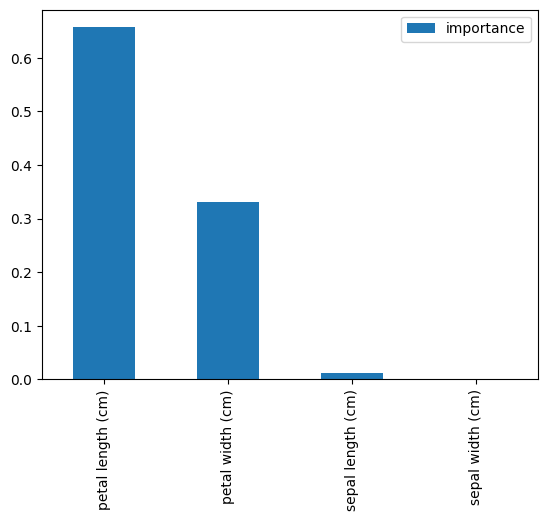

In [ ]:
feature_names = iris.feature_names

feature_importance_dict = dict(zip(feature_names, feature_importance))

importance_df = pd.DataFrame.from_dict(feature_importance_dict,
                                       orient = 'index',
                                       columns = ['importance'])

importance_df.sort_values(by = 'importance', ascending = False, inplace = True)

print(importance_df)

importance_df.plot(kind = 'bar')

---
# End of Video 3
---

# Creating a Decision Tree
>- In the next cell we will create a decision tree
>- We will treat this as a full example and repeat some of the prior individual steps in one code cell
>- Later in the course we will expand our knowledge of predictive modeling and use training and testing datasets and examing performance metrics

## Plotting a Decision Tree with `plot_tree`
>- [`plot_tree` doc](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree)
>- Some common parameters passed to `plot_tree`
>>- *decision_tree*: this is the decision tree classifier we build. At a minimum we have to pass this to `plot_tree`
>>- *feature_names*: this allows us to see the names of the features in the decision tree which is critical for interpreting the results
>>- *class_names*: these are the labels for our target variable. Again, this is critical for interpreting the results of our decision tree
>>- *filled*: When set to True this colors in the nodes on the decision tree showing the majority class
>>- *proportion*: When set to True this shows proportions/percentages rather than raw counts

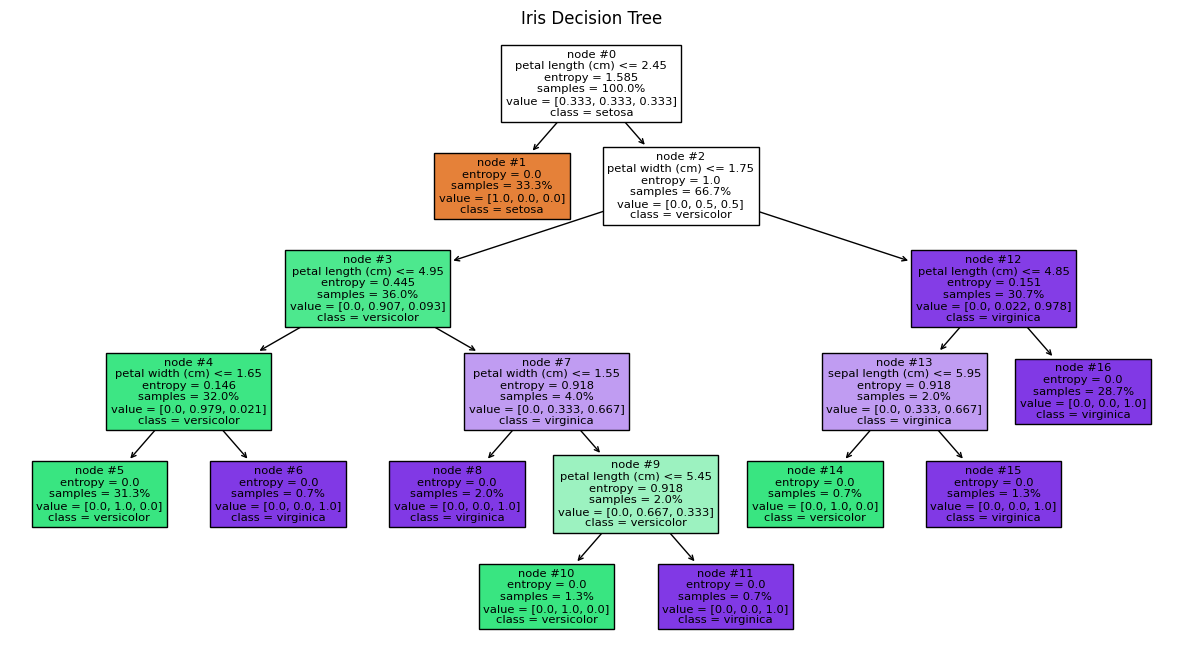

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

import matplotlib.pyplot as plt
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target


clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

clf.fit(X,y)

plt.figure(figsize=(15,8))

plot_tree(clf,
          feature_names = iris.feature_names,
          class_names = iris.target_names,
          filled=True,
          proportion=True,
          node_ids = True)

plt.title("Iris Decision Tree")
plt.show()

---
# End of Video 4
---